# 主題：健康上網AI守門員！ 色情圖片辨識
### 組員：陳怡升、張睿傑、李志恆<br/>
### 概述：
我們打造出一個新型態的<span style="color:red">健康上網守門員</span><br/>透過色情圖片辨識，當偵測到使用者在瀏覽<span style="color:red">色情內容</span>時，將會自動播放歌曲[Big Enough](https://www.youtube.com/watch?v=rvrZJ5C_Nwg)中[牛仔的尖叫片段](https://www.youtube.com/watch?v=Qcp2W1-SFt4)，<br/>然後讓滑鼠亂飄移，並<span style="color:red">按下Alt+F4關閉視窗</span>讓使用者無法正常瀏覽色情內容。
<br/>程式實際使用示範影片：[有碼版本示範影片](https://youtu.be/x73VKhXCJs4)
<br/>同場加映：[上傳到PornHub的無碼版本示範影片](https://www.pornhub.com/view_video.php?viewkey=ph5cfb09f374745) (內含18+畫面，慎入！！)


### 目的：
本來我們想做色情圖片辨識，不過想想辨識出來也要有個用途，靈光一閃就想到這個"健康上網AI守門員"的idea<br/>
我們有空的話，會在暑假將其改良成開機後自動在背景執行，為我國青少年身心健康發展盡一份心力。



### 具體做法：
* **資料取得：**<br/>
我們將透過github上的[NSFW數據庫](https://github.com/GantMan/nsfw_model)來取得資料進行訓練。<br/>
將資料集中corrupted image 移除後剩下的**212038**張圖片被分為5種類別，分別為：<br/>
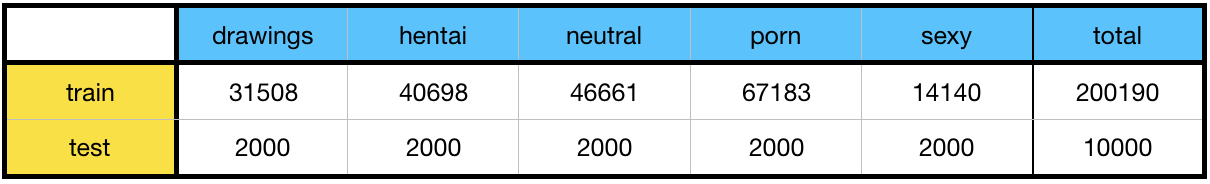
<br/><br/>
* **模型訓練：** <br/>
使用Keras中的<span style="color:red">InceptionV3</span>模型中ImageNet 的權重來進行transfer learning，再加上兩層<span style="color:red">DenseNet</span>提高辨識度。<br/><br/>
* **訓練結果：** <br/>
在經過長時間訓練後，模型實際使用時正確率很高，在將圖片分類上能夠達到<span style="color:red">90%</span> 以上的正確率。<br/><br/>
訓練模型建置的github 連結: https://github.com/juichiehchang/NCTS5017-PythonFinalProject<br/><br/>
* **程式建置：** <br/>
我們把訓練完成的**模型**與**權重**讀入，打造出一個能夠辨識輸入圖片類別的辨識器。<br/>
接著使用PIL套件截圖，並將圖片分割為<span style="color:red">18</span>個小圖片進行辨識<br/>
(我們將螢幕分割為3x5共15張圖片，並在影片播放位置的**重點區域**多剪兩張以及整個畫面一張，總共18張)<br/><br/>
該程式將<span style="color:red">定期做螢幕截圖</span>並辨識圖片中是否有色情內容。<br/>
如果色情內容的比例超過一定水準，將會使用winsound套件自動播放歌曲Big Enough中牛仔的尖叫片段，<br/>
並使用PyAutoGUI讓<span style="color:red">滑鼠隨機飄移無法操控</span>並在十五秒後<span style="color:red">按下ALT+F4關閉視窗</span><br/>
而如果判斷色情內容比例超過一定水準，但尚未達到該關閉的程度(可能有誤判)，則會播放「光頭哥哥的嘿嘿」音效來提醒使用者，並將記錄累加，如持續超過一定水準也會執行關閉程式。

## 此程式的缺點：
使用本模型，有一個缺點，就是非常耗CPU資源，<br/>
當執行判斷時，我們的CPU使用率會衝到100%約3秒，如下方圖片所示。<br/>
(高峰為程式執行判斷的時候)<br/>
![IMAGES](https://trello-attachments.s3.amazonaws.com/5c6a07f61246780dd23d1ee9/5cf9e77c1b3c9662de99a4de/9638d71ae5f2051ebe93f0c0a96d4c99/%E6%93%B7%E5%8F%96.JPG)
未來如果要改進，需要尋找有無抑制CPU使用率的寫法，<br/>
或將截圖<span style="color:red">上傳至雲端</span>，由雲端的伺服器做判斷後，再將結果回傳給用戶端執行。

# 程式碼內容
(歡迎複製過去自行使用，其他檔案請至[雲端硬碟下載](https://drive.google.com/file/d/1nRXHMx9T4MLmZBP2rfjc8G8krewEHhaD/view?usp=sharing)整合好的zip檔案)<br/>(後面還有趣事與訓練模型簡介喔！)

In [2]:
#import predict
import cv2
import numpy as np
from PIL import Image
from PIL import ImageGrab
import time
import pyautogui
import winsound
#import sys
#sys.setrecursionlimit(50)
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras

def load_image(img_path, size):
    image = keras.preprocessing.image.load_img(img_path, target_size = size)
    image = keras.preprocessing.image.img_to_array(image)
    image /= 255
    return np.expand_dims(image, axis=0)

class predictor():

    model = None
    categories = ['drawings', 'hentai', 'neutral', 'porn', 'sexy']
    size = None
    
    def __init__(self, model_path):
        if('inceptionV3' in model_path):
            self.size = (299, 299)
        self.model = keras.models.load_model(model_path)
       
    def predict_from_path(self, img_path):
        
        image = load_image(img_path, self.size)
        prediction = self.model.predict(image)
        #print(prediction)
        return self.categories[np.argmax(prediction)]

    def predict_from_array(self, img):

        image = img/255
        prediction = self.model.predict(np.expand_dims(image, axis=0))
        return self.categories[np.argmax(prediction)]


C:\Users\Public\ANACONDA3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
weights_path = "C:/Users/user/Downloads/pythonF/inceptionV3.299x299.h5" #請自行修改路徑

p = predictor(weights_path)
categories = ['drawings', 'hentai', 'neutral', 'porn', 'sexy']
    
#截圖程式
#自動在螢幕產生15個截圖
def GrabAndCut():
    images = []
    width = 300  
    height = 300
    im=ImageGrab.grab() #截圖
    wid_1 = -300
    hei_1 = -300
    for i in range(3):
        wid_1 = -300
        for i in range(5):
            im_temp = im.crop((   #裁切圖片，裁切出3*5個
                width +wid_1,
                height + hei_1,
                width +wid_1 + 300,
                height + hei_1 + 300))
            images.append(im_temp.resize((299,299)))
            wid_1+=300
        hei_1+=300 
    images.append(im.crop((           #多剪兩張在平常的播放位置的內容
                100,
                200,
                800,
                800)).resize((299,299))) #將圖片大小設定為299x299
    images.append(im.crop((
                500,
                200,
                1100,
                800)).resize((299,299)))
    images.append(im.resize((299,299)))
    return images

def CheckImages(images):     #分類函式 將圖片分類
    result = []
    for i in range(len(images)):
        result.append(p.predict_from_array(np.array(images[i])))
    return result
    #判斷時要使用np.array判斷，所以我們將圖片轉換成array
    #然後將判斷結果連接到一個叫result的陣列


def Judge(result, beforehand):  #根據結果做出判斷的程式
    testing = result.count("porn")*2 + result.count("hentai")
    #使用自訂的判斷權重，因為在看動漫時較容易判斷出hentai故hentai需要比較高的權重
    if testing >=9 or (testing + beforehand) >=11:
        winsound.PlaySound("AHHH.wav", winsound.SND_FILENAME|winsound.SND_ASYNC)
        #使用winsound播放音樂， winsound.SND_FILENAME 是指播放該檔名的檔案
        #winsound.SND_ASYNC 是指播放後就繼續執行剩下的程式碼
        for i in range(40):  #亂動滑鼠的部分
            pyautogui.moveTo(np.random.randint(1,1910), np.random.randint(1,1070),0.25)
        pyautogui.keyDown("ALT")   #使用PyAutoGUI的套件，模擬按下ALT+F4
        pyautogui.keyDown("F4")
        pyautogui.keyUp("ALT")
        #x, y =pyautogui.size()           #移動到右上角關閉視窗
        #pyautogui.moveTo(x-10, 10, 10)   #後來選擇ALT+F4，故此段註解
        #pyautogui.click()              
        print("母湯喔")
        Judges = 0
    elif testing >=5:
        print("嘿嘿")     #播放光頭哥哥的「嘿嘿」音效，警告使用者
        winsound.PlaySound("hehe.wav", winsound.SND_FILENAME|winsound.SND_ASYNC)
        Judges = 1
        beforehand = testing   #將結果回傳，如果重複出現危險內容將會執行關閉程式
    else:
        print("讚喔")
        Judges = 1
        beforehand = 0
    return Judges, beforehand

beforehand = 0
#while(1):                  #正式程式，將內容串在一起
for i in range(8):          #本來是使用while迴圈，不過因為要呈現不想出現KeyboardInterrupt
                            #所以使用for迴圈做八次
    print("Judge start")
    images = GrabAndCut()
    result = CheckImages(images)
    Judges, beforehand = Judge(result, beforehand)
    print(Judges)
    for i in range(len(categories)):     #打印出分類模型究竟分類出來的結果
        print("%s: %d"%(categories[i], result.count(categories[i])))
    print("Judge end\n")
    time.sleep(1)

C:\Users\Public\ANACONDA3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Judge start
讚喔
1
drawings: 10
hentai: 0
neutral: 6
porn: 0
sexy: 2
Judge end

Judge start
母湯喔
0
drawings: 1
hentai: 0
neutral: 7
porn: 10
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 1
hentai: 0
neutral: 17
porn: 0
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 9
hentai: 0
neutral: 9
porn: 0
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 12
hentai: 0
neutral: 6
porn: 0
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 7
hentai: 0
neutral: 10
porn: 1
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 2
hentai: 0
neutral: 15
porn: 1
sexy: 0
Judge end

Judge start
讚喔
1
drawings: 5
hentai: 0
neutral: 13
porn: 0
sexy: 0
Judge end



### 趣聞：
此程式準確率還是有待加強，
比方會將一些新聞的圖片判斷為porn，推測可能是因為原先training data **並沒有文字**，同時切割過的圖片較不易判斷<br/>
(如下方圖片所示)<br/>所以我們使用指定公式，當porn分類超過5個，才執行關閉程式。
![IMAGE](https://trello-attachments.s3.amazonaws.com/5c6a07f61246780dd23d1ee9/5cf9e77c1b3c9662de99a4de/74eadfc81e7e8158d61fb029b8b473e4/messageImage_1559742855638.jpg)